# Streamplot of a linear system

Find more tutorials on my webpage: [yairmau.com](http://yairmau.com).

End product:
<figure>
  <img src="figures/linear-system.png" alt="linear system" width="600">
</figure>

## import stuff

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

## customize figure

In [8]:
plt.ioff()
fig = plt.figure(1, figsize=(10,7))  # figsize accepts only inches.
fig.subplots_adjust(left=0.10, right=0.97, top=0.82, bottom=0.10,
                    hspace=0.02, wspace=0.02)
ax = fig.add_subplot(111)

params = {'backend': 'ps',
          'axes.labelsize': 22,
          'legend.fontsize': 16,
          'legend.handlelength': 2.5,
          'legend.borderaxespad': 0,
          'xtick.labelsize': 22,
          'ytick.labelsize': 16,
          'font.family': 'serif',
          'font.size': 22,
          # Times, Palatino, New Century Schoolbook,
          # Bookman, Computer Modern Roman
#           'font.serif': ['Times'],
          'ps.usedistiller': 'xpdf',
          'text.usetex': True,
          # include here any neede package for latex
          'text.latex.preamble': [r'\usepackage{amsmath}',
                                  ],
          }
plt.rcParams.update(**params)

/Users/yairmau/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


## define system of equations

$$
\frac{dx}{dt} = ax + by\\
\frac{dy}{dt} = cx + dy
$$

In [9]:
# parameters as a dictionary
p = {'a': -1.0, 'b': +0.2,
     'c': +1.2, 'd': -1.5}

# the equations
def system_equations(x,y):
    return [p['a'] * x + p['b'] * y,
            p['c'] * x + p['d'] * y,
           ]

## streamplot configuration

In [10]:
min_x, max_x = [-1, 1]
min_y, max_y = [-4, 4]
div = 50
X, Y = np.meshgrid(np.linspace(min_x, max_x, div),
                   np.linspace(min_y, max_y, div))

density = 2 * [0.80]
minlength = 0.2
arrow_color = 3 * [0.5]
ax.streamplot(X, Y, system_equations(X, Y)[0], system_equations(X, Y)[1],
              density=density, color=arrow_color, arrowsize=2,
              linewidth=2, minlength=minlength)

## nullclines

Plot the nullclines, i.e., the curves for which the right-hand side of the differential equations is zero.
$$
\frac{dx}{dt} = 0 = n_1(x,y) = ax + by\\
\frac{dy}{dt} = 0 = n_2(x,y) = cx + dy
$$

In [11]:
null_0 = ax.contour(X, Y, system_equations(X, Y)[0],
                    levels=[0], colors='black', linewidths=3)
null_1 = ax.contour(X, Y,system_equations(X, Y)[1],
                    levels=[0], colors='blue', linewidths=3)
n0 = null_0.collections[0]
n1 = null_1.collections[0]

## eigenvectors

In [12]:
a, b, c, d = sp.symbols('a b c d')
Jacobian = sp.Matrix([[a, b],[c, d]])
ev1 = sp.lambdify((a, b, c, d), list(Jacobian.eigenvects())[0][2][0][0], dummify=False)
ev2 = sp.lambdify((a, b, c, d), list(Jacobian.eigenvects())[1][2][0][0], dummify=False)
eigen_vec = 100 * np.array([[ev1(**p), 1.0],
                            [ev2(**p), 1.0]])

eigen_0, = ax.plot([eigen_vec[0, 0],-eigen_vec[0, 0]],
                   [eigen_vec[0, 1],-eigen_vec[0, 1]],
                   color='red', lw=2, ls="--")
eigen_1, = ax.plot([eigen_vec[1, 0],-eigen_vec[1, 0]],
                   [eigen_vec[1, 1],-eigen_vec[1, 1]],
                   color='orange', lw=2, ls="--")
dash = (10, 7, 10, 7)
eigen_0.set_dashes(dash)
eigen_1.set_dashes(dash)

## some labels, legend, and text

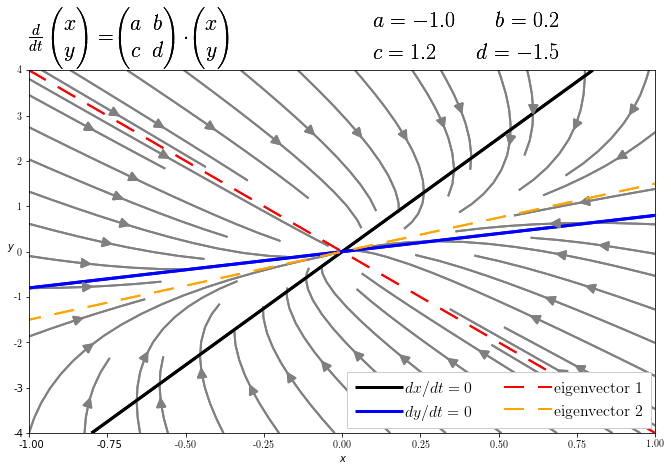

In [13]:
ax.set_ylabel(r"$y$", rotation='horizontal')
ax.set_xlabel(r"$x$", labelpad=5)
ax.legend([n0, n1, eigen_0, eigen_1],
          [r'$dx/dt=0$', r'$dy/dt=0$',
           "eigenvector 1", "eigenvector 2"],
          loc="lower right",
          frameon=True, fancybox=False, shadow=False, ncol=2,
          borderpad=0.5, labelspacing=0.5, handlelength=3, handletextpad=0.1,
          borderaxespad=0.3, columnspacing=2, framealpha=1.0)
ax.text(-1.0, 4.3, (r"$\frac{d}{dt}\begin{pmatrix}x\\y\end{pmatrix}=$"
                    r"$\begin{pmatrix}a&b\\c&d\end{pmatrix}\cdot$"
                    r"$\begin{pmatrix}x\\y\end{pmatrix}$"))
ax.text(0.1, 5.0, r"$a={:.1f}\qquad b={:.1f}$\\".format(p['a'], p['b']))
ax.text(0.1, 4.3, r"$c={:.1f}\qquad d={:.1f}$\\".format(p['c'], p['d']))
ax.axis([min_x, max_x, min_y, max_y])
fig.savefig("./figures/linear-system.png", resolution=300)
plt.draw()
fig
